# Submetric 3: **Cost**

## Relevance of cost

It is trivial that cost of living has a huge impact on the quality of life in any neighborhood. This is why we decided that cost of housing would be crucial in finding the best neighborhood in Pittsburgh.

---

## Pittsburgh Cost of Rent Per Unit Data Set

Includes data from a **2015** census

We will be analyzing the average asking price for rent for each neighborhood to determine which is the most affordable.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("contract-rent.csv")
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'contract-rent.csv'

As you can see, this DataFrame gives us the number of units in each neighborhood in several ranges of rent cost. Therefore, in order to find the mean price per neighborhood, we must account for these ranges in price.

In [ ]:
pricePoints = [50, 125, 175, 225, 275, 325, 375, 425, 475, 525, 575, 625, 675, 725, 775, 850, 950, 1125, 1375, 1750, 2250, 2750, 3250, 3500]

count = 0
weighted_total = [0] * 91
col = data.columns[6:50]

for i in col:
    total_prices = []
    if (i.startswith("Estimate")):
        for j in data[i]:
            j = int(j)
            total_prices.append(j*pricePoints[count])
        count += 1

    for k in range(len(total_prices)):
        weighted_total[k] += total_prices[k]
df = pd.DataFrame(weighted_total)
df

,0
0,491375
1,50125
2,411600
3,153400
4,56850
...,...
86,383250
87,40625
88,326525
89,370925


In the code block above, we take the mean price within each range (the pricePoints list) and multiply it by the number of associated units in each neighborhood. We then have the total price paid by tenants in every neighborhood.

In [ ]:
weighted_avg = [0] * 91

for i in range(len(weighted_total)):
    weighted_avg[i] = weighted_total[i]/(data["Estimate; With cash rent:"][i])
df = pd.DataFrame(weighted_avg)
df

/var/folders/49/t0n2_fjn7_bgcd57dxjrtp8c0000gn/T/ipykernel_18286/2392708090.py:4: RuntimeWarning: invalid value encountered in double_scalars
  weighted_avg[i] = weighted_total[i]/(data["Estimate; With cash rent:"][i])


,0
0,714.207849
1,686.643836
2,803.906250
3,727.014218
4,342.469880
...,...
86,678.318584
87,501.543210
88,798.349633
89,738.894422


We must then average out the prices by dividing by the total number of units in each neighborhood, because there is a different number of units in each neighborhood.

<AxesSubplot:xlabel='Neighborhood'>

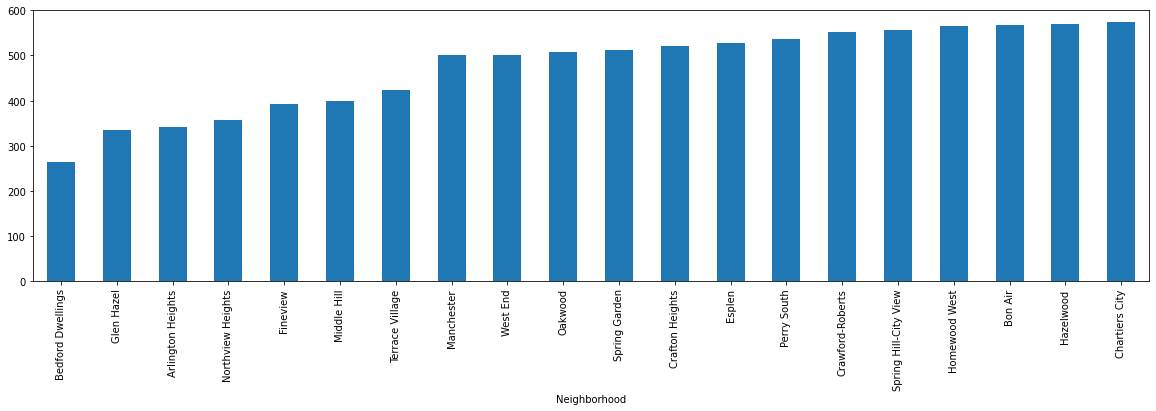

In [ ]:
sr = pd.Series(weighted_avg, index = data["Neighborhood"])
sr = sr.sort_values(ascending=True)
sr[:20].plot.bar(figsize=(20,5))

Here are the 20 neighborhoods with the lowest rent price<br /> 

## Conclusion

simply restate steps used to get to this plot...<br />
* a
* a
* Then we did a

Now that we've looked at the cheapest neighborhoods in Pittsburgh based on rent, we can combine our findings from the other submetrics to conclude the **best** neighborhood to live in.
